<a href="https://colab.research.google.com/github/Adityasutar/Personal-Loan-prediction-using-random-forest/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **bold text**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
%matplotlib inline
data = pd.read_excel('/content/Bank_Personal_Loan_Modelling.xlsx','Data')
df = pd.DataFrame(data)
df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [12]:
df.shape #checking the shape of data

(5000, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [14]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [15]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [16]:
sum(df['Mortgage']==0) #Checking how many zeroes are there in mortrage

3462

In [17]:
sum(df['CCAvg']==0)  #Checking how many zeroes are there in Avg

106

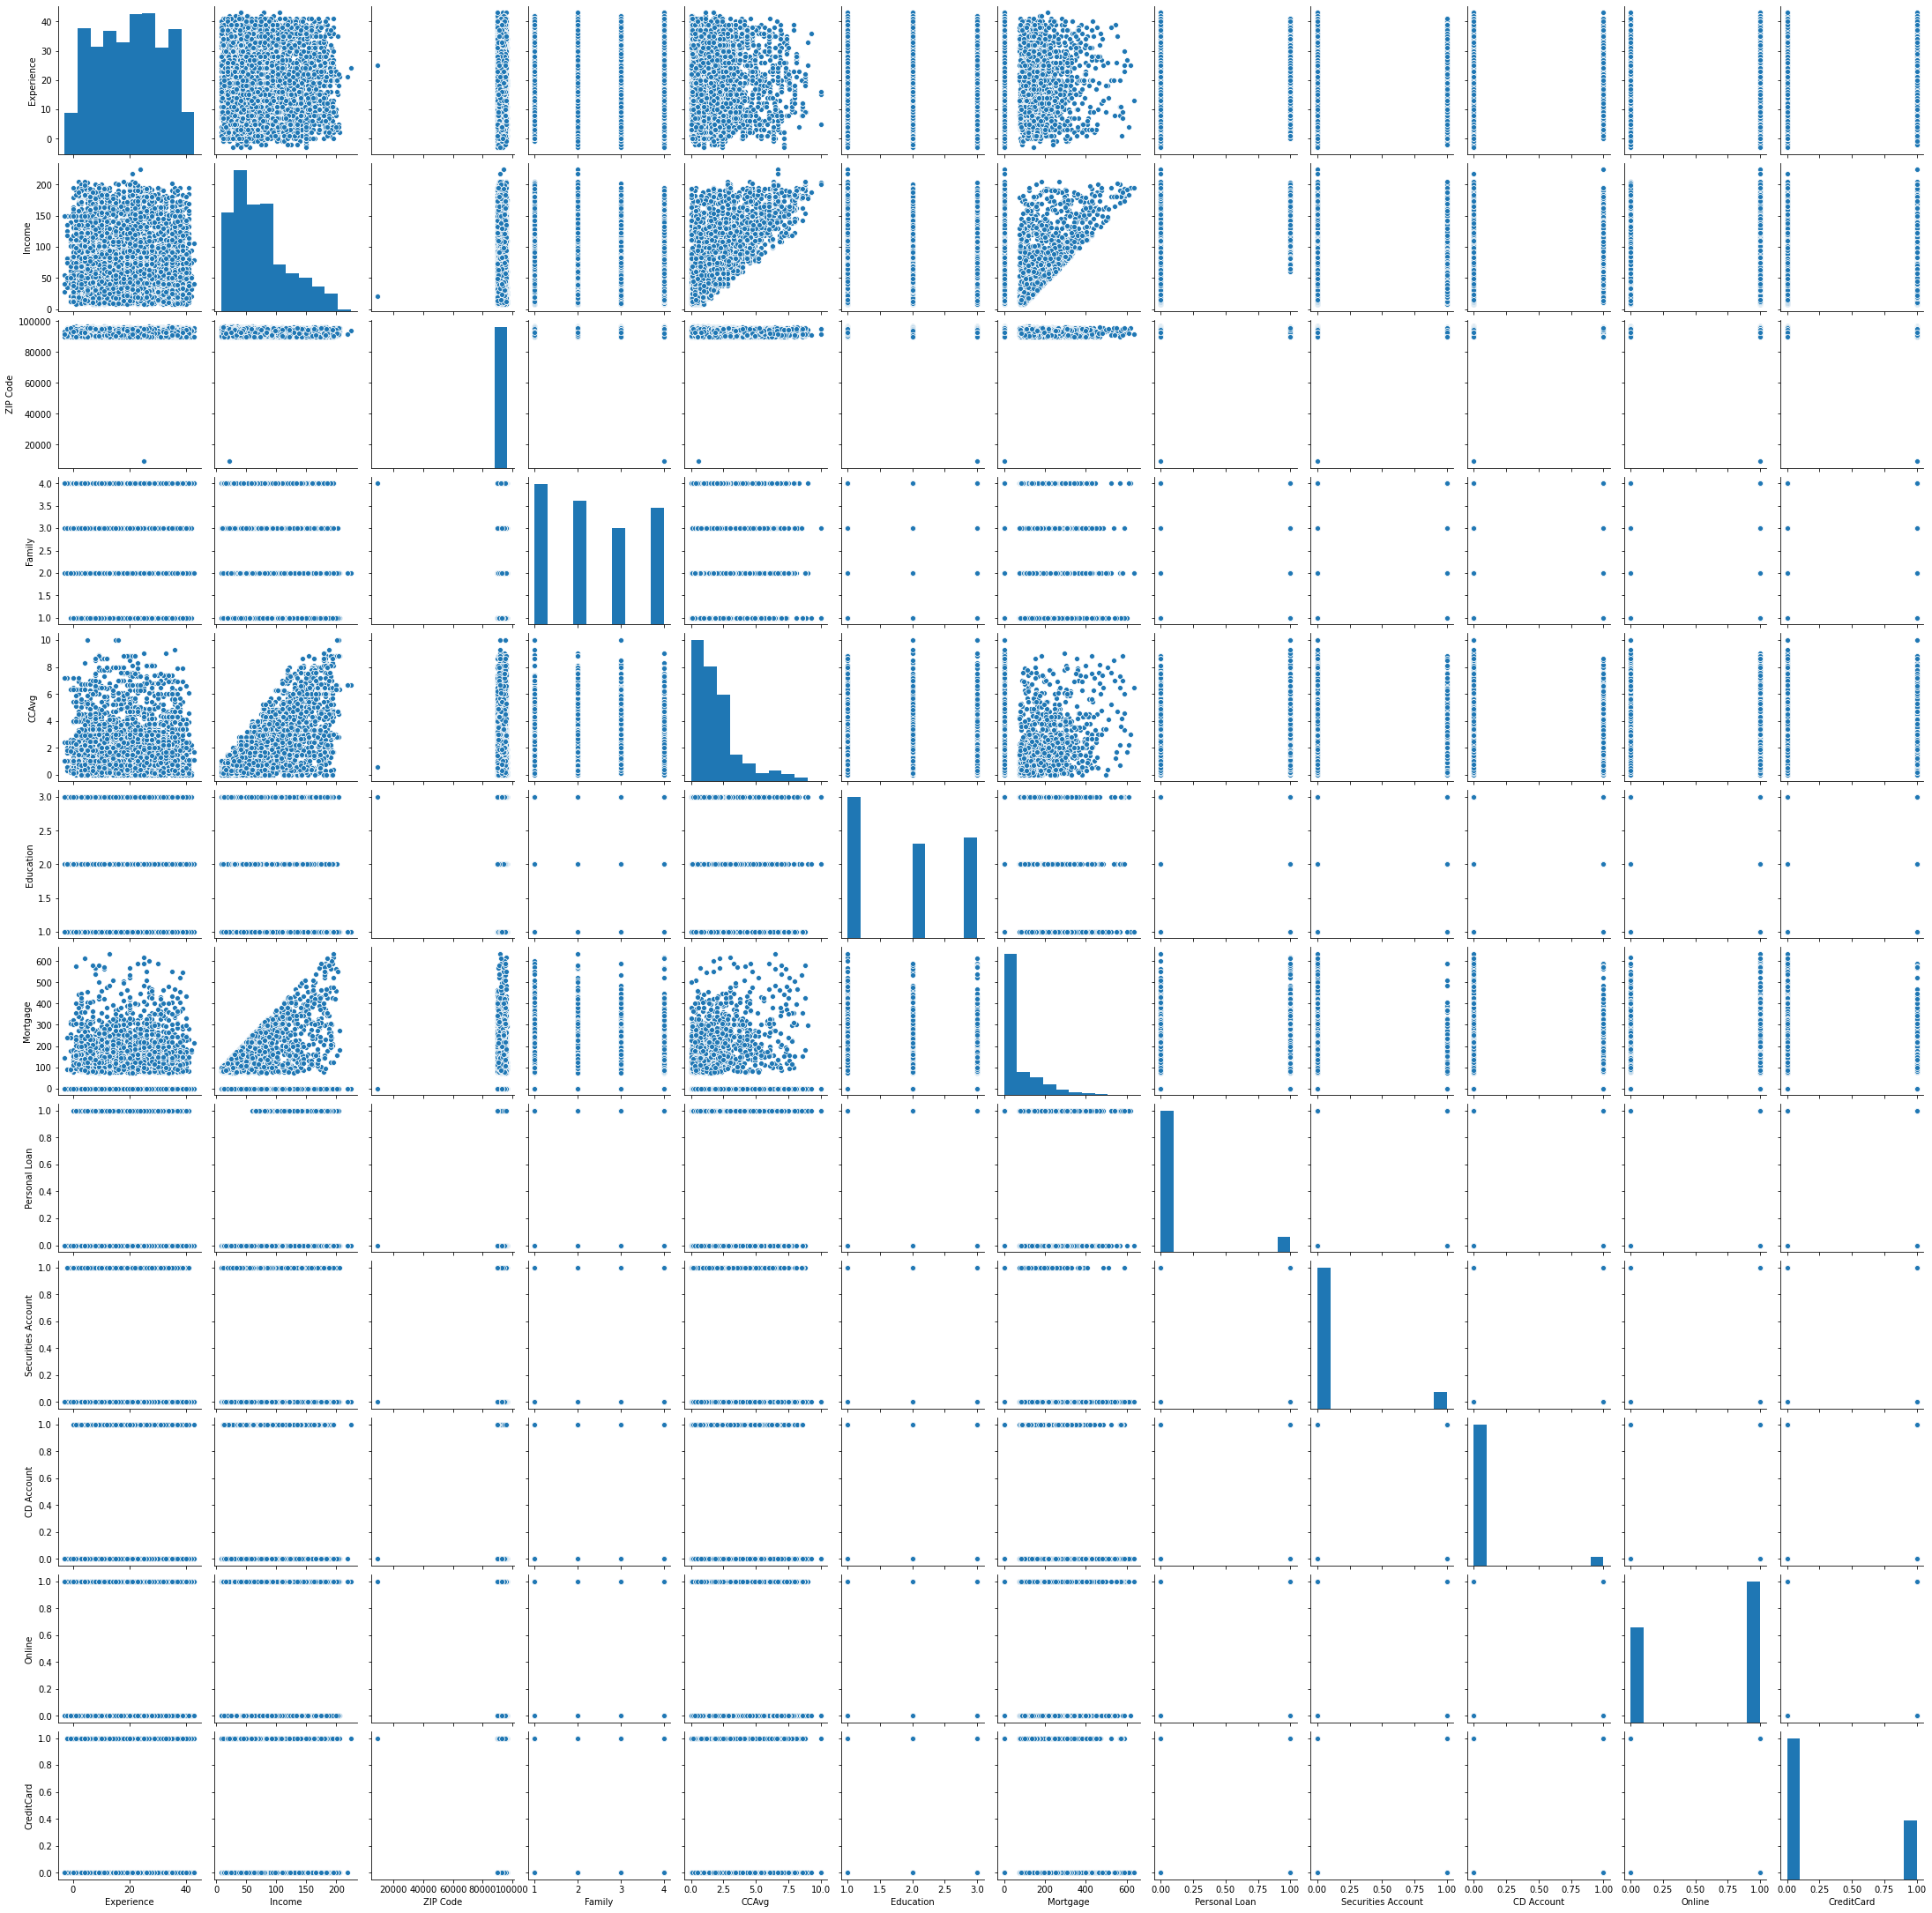

In [18]:
da=df.drop(['ID','Age'],axis=1)
sns.pairplot(da)

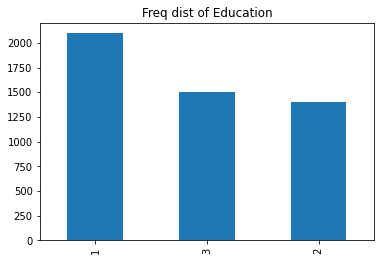

In [19]:
df['Education'].value_counts().plot.bar(title='Freq dist of Education')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81e29b2a90>,
      dtype=object)

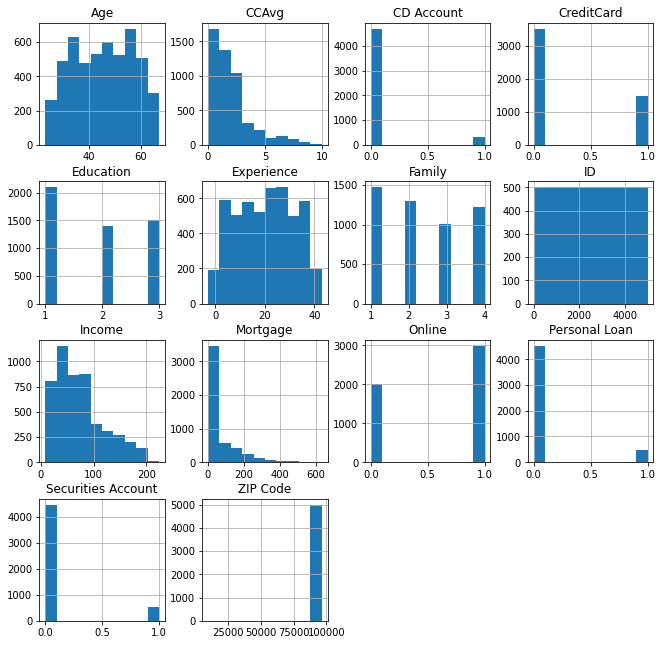

In [20]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81e034ce80>,
      dtype=object)

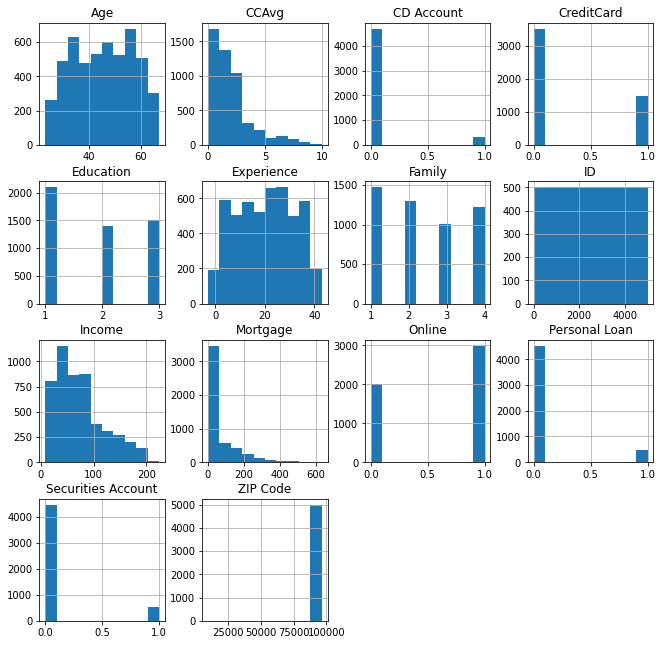

In [21]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

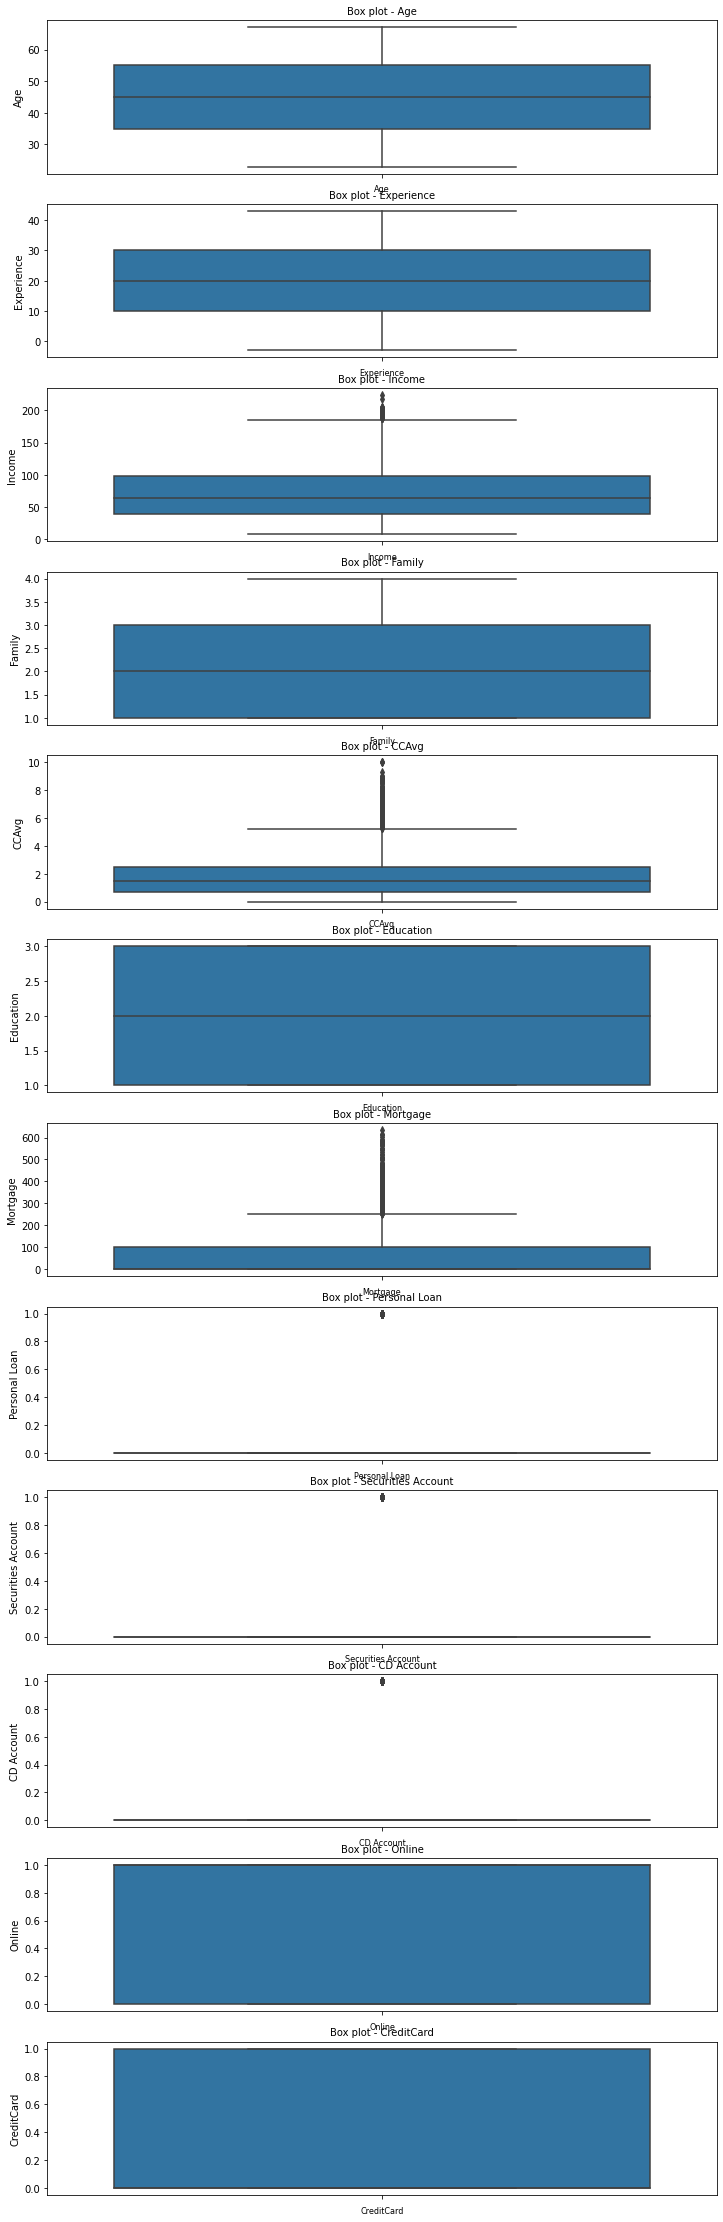

In [22]:
col_names = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']
fig,ax = plt.subplots(len(col_names),figsize=(12,40))
for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

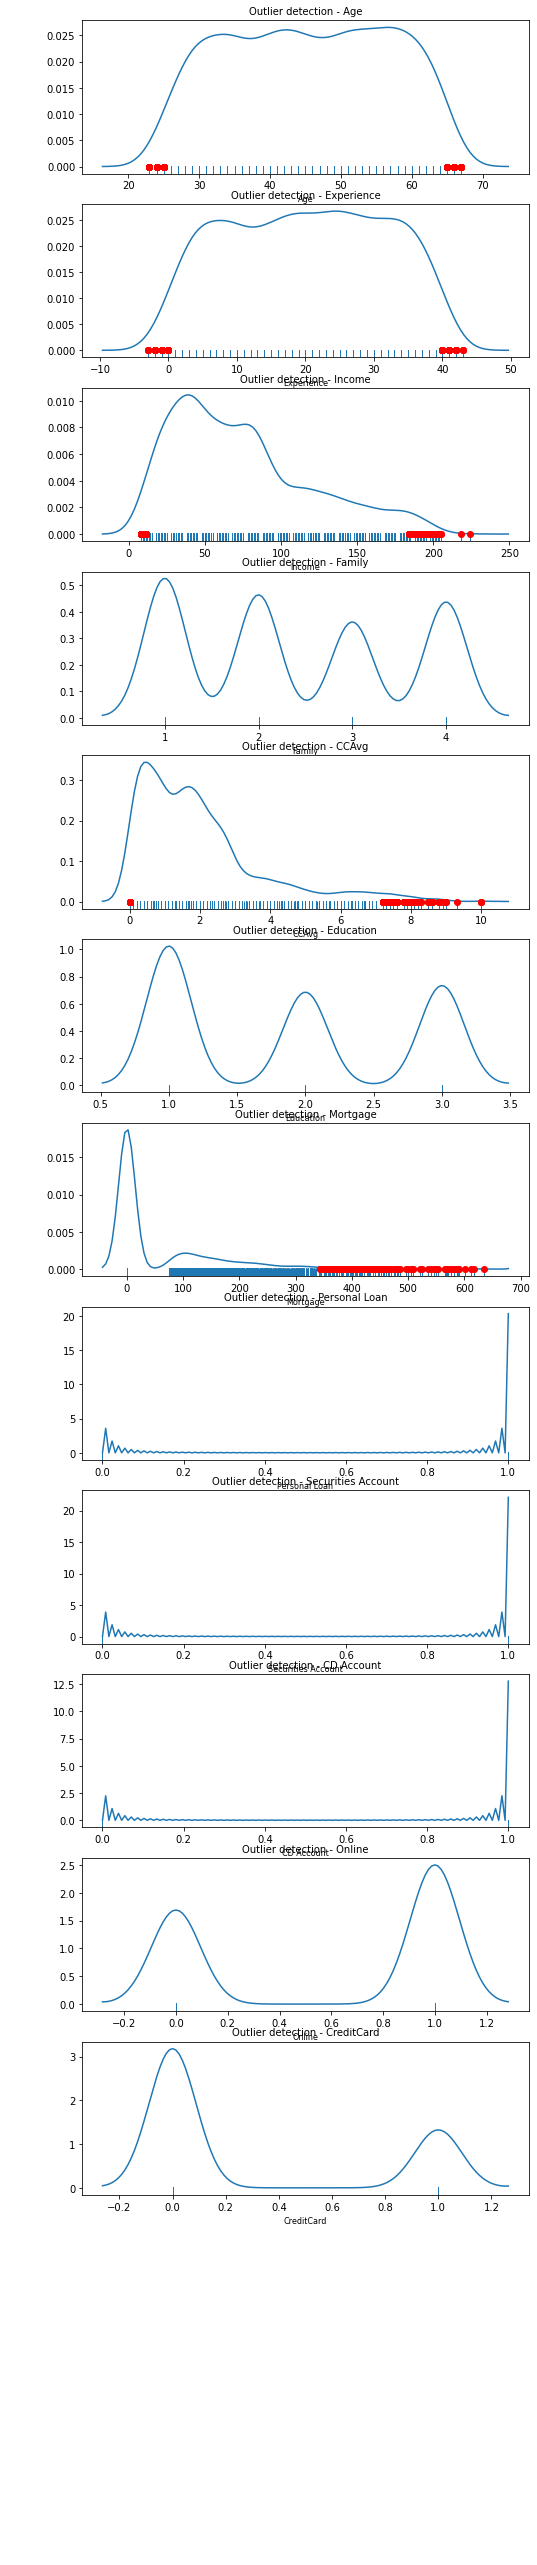

In [23]:
#Removing outliers from percentile method
def percentile_based_outlier(data, threshold=95):
  diff = (100-threshold)/2
  minval, maxval = np.percentile(data, [diff, 100 - diff])
  return (data < minval) | (data > maxval)
col_names = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']
fig,ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = df[col_val][:5000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()
placing_y = df['Personal Loan']

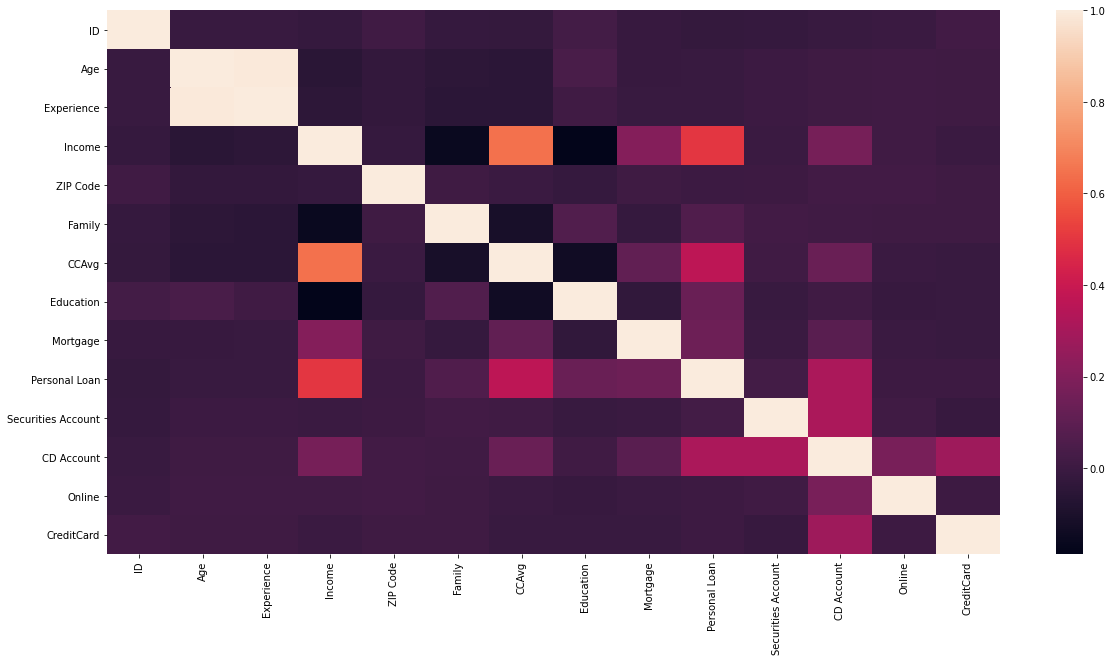

In [24]:
#checking the correlations
fig,ax = plt.subplots(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
x = df.iloc[:,[2,11]]

In [25]:
# selecting the feature variable 
X = df.iloc[:,[3,7,6]]
X.head()

,Income,Education,CCAvg
0,49,1,1.6
1,34,1,1.5
2,11,1,1.0
3,100,2,2.7
4,45,2,1.0


In [29]:
#selecting the output variable
Y = placing_y
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [33]:
#Splitting the X,Y data into Train and test set
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30,random_state=0)
x_train.head()
y_train.head()
#Scaling or Normalizing the Train and Test set
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)  
x_test = sc_x.transform(x_test)

print(x_train)

[[ 1.8151347  -1.04711112  3.33396594]
 [ 0.6042706   0.14978271  0.59229145]
 [-0.67146121  1.34667655 -0.20736361]
 ...
 [-1.08229009  1.34667655 -0.60719114]
 [-0.54172577 -1.04711112 -0.26448183]
 [-0.77957407  1.34667655  0.07822748]]


# **Random Forest**

In [34]:
#Applying random forest for generating accurate results
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=12, random_state=0)
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)
y_train_pred = regressor.predict(x_train)

print(pred)
y_test

[0. 0. 0. ... 0. 0. 0.]


398     0
3833    0
4836    0
4572    0
636     0
       ..
4554    0
4807    0
1073    0
2906    0
1357    0
Name: Personal Loan, Length: 1500, dtype: int64

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,pred.round()))
print("Train accuracy:" + str ( accuracy_score(y_train,y_train_pred.round())*100))
print(classification_report(y_test,pred.round()))
print(accuracy_score(y_test, pred.round())*100)

[[1360   12]
 [  30   98]]
Train accuracy:99.57142857142857
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1372
           1       0.89      0.77      0.82       128

    accuracy                           0.97      1500
   macro avg       0.93      0.88      0.90      1500
weighted avg       0.97      0.97      0.97      1500

97.2


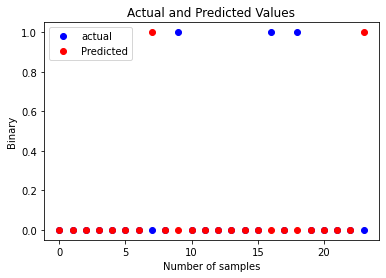

In [36]:
#Visualizing the data for first 25 samples of actual and predicted values
plt.plot(Y[0:24],'bo',label = 'actual')
plt.plot(pred[0:24].round(), 'ro', label = 'Predicted')
plt.legend()
plt.xlabel('Number of samples'); plt.ylabel('Binary'); plt.title('Actual and Predicted Values');